In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("housing.csv")

In [60]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [61]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [62]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [86]:
data['CRIM'].fillna(data['CRIM'].mean() , inplace = True)
data['ZN'].fillna(data['ZN'].mean() , inplace = True)
data['INDUS'].fillna(data['INDUS'].mean() , inplace = True)
data['CHAS'].fillna(data['CHAS'].mean() , inplace = True)
data['AGE'].fillna(data['AGE'].mean() , inplace = True)
data['LSTAT'].fillna(data['LSTAT'].mean() , inplace = True)

In [87]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: xlabel='RM', ylabel='MEDV'>

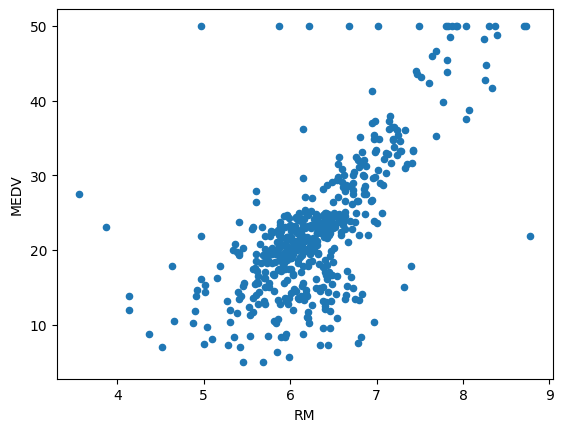

In [90]:
data.plot.scatter('RM', 'MEDV')

<Axes: >

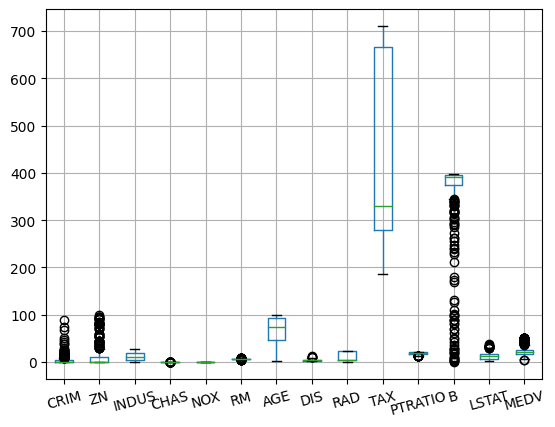

In [91]:
data.boxplot(column_names, rot=15)

In [92]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

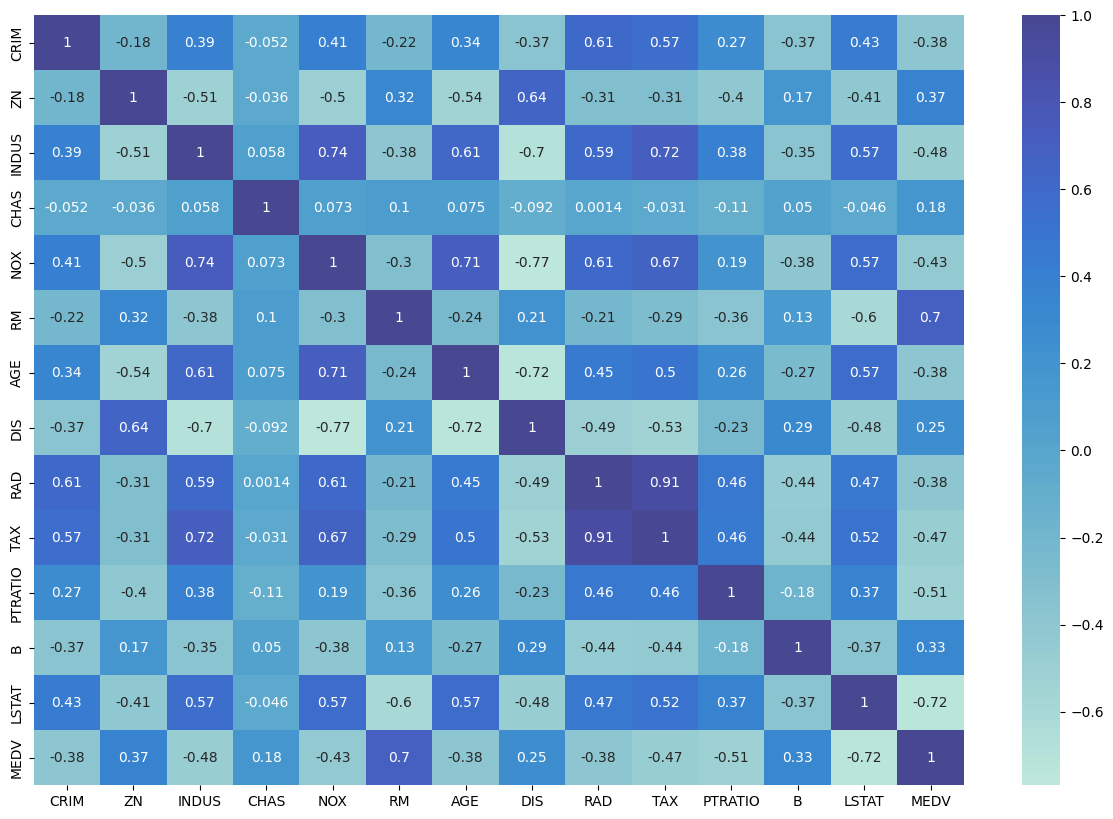

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(data.select_dtypes(include=['int','float']).corr(),annot=True,center = 2)
plt.show()

In [94]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [97]:
X = data[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX' , 'RAD' ,
'AGE' , 'CRIM' , 'ZN']]
Y = data['MEDV']
seed= 1
X_train , X_test, Y_train , Y_test = train_test_split(X, Y,
test_size=0.20, random_state=seed)

In [98]:
X.shape

(506, 10)

In [99]:
Y.shape

(506,)

In [100]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train , Y_train)
LinearRegression()

LinearRegression()

In [113]:
y_pred= LR.predict(X_test)

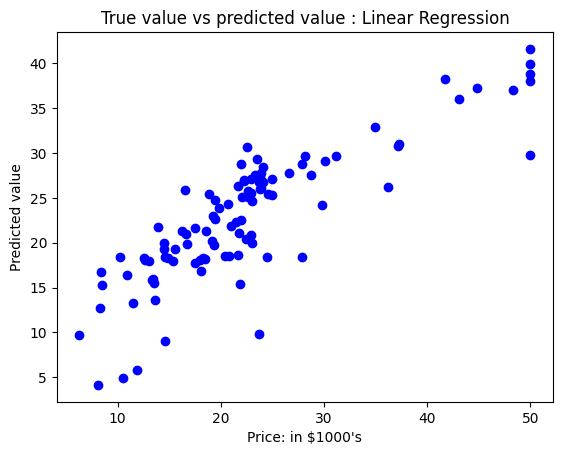

In [120]:
plt.scatter(y_test, y_pred, c = 'Blue')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [116]:
X_test

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,RAD,AGE,CRIM,ZN
307,7.53,6.849,18.4,2.180000,222,0.472,7,70.3,0.049320,33.000000
343,7.18,6.696,17.6,3.780000,370,0.484,5,56.4,0.025430,55.000000
47,18.80,6.030,17.9,11.083992,233,0.448,3,85.5,0.229270,0.000000
67,8.10,5.878,18.9,6.070000,345,0.409,4,21.4,0.057890,12.500000
362,10.19,5.362,20.2,18.100000,666,0.770,24,96.2,3.678220,0.000000
...,...,...,...,...,...,...,...,...,...,...
92,8.16,6.442,18.2,15.040000,270,0.464,4,53.6,0.042030,11.211934
224,4.14,8.266,17.4,6.200000,307,0.504,8,78.3,0.315330,0.000000
110,13.00,6.195,20.9,8.560000,384,0.520,5,54.4,0.107930,0.000000
426,15.69,5.837,20.2,18.100000,666,0.584,24,59.7,3.611874,0.000000


In [117]:
from sklearn import metrics
import numpy as np

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squred Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squred Error:",metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.311333848096257
Mean Squred Error: 29.58597268132346
Root Mean Squred Error: 29.58597268132346


In [118]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.311333848096257
